# **LSTM+CV**

***1. IMPORT LIBRARIES***

In [ ]:
import pandas as pd
from nltk import word_tokenize
from collections import Counter

***2. LOAD DATASET***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/thesiss/French_D.csv')

In [ ]:
data.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','text','clean_with_stopwords'], axis=1, inplace=True)

In [ ]:
data['final_clean'].isnull().sum()

0

In [ ]:
data

,Fake,final_clean
0,0,tente incendier femme indemne gravement bruler...
1,0,etre renaud avoir faire retour scene octobre a...
2,0,tailleur rouge message avoir vouloir envoyer h...
3,0,foot ligue tout resultat eme journee octobre m...
4,0,abonner podcast pouvoir abonner telechargement...
...,...,...
27811,1,pourcent libanais refaire onu demande liban ar...
27812,1,refugier syrien humilier empeche famill rom tr...
27813,1,mehdi meklat lance banane christiane taubira a...
27814,1,visite afghanistan marine pen refuse participe...


***3. CONVERT TO VECTORS***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=3000)
output=vectorizer.fit_transform(data['final_clean'])

In [ ]:
output

<27816x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 2863963 stored elements in Compressed Sparse Row format>

***4. SPLIT DATA***

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(output.toarray(),data['Fake'].values,test_size=0.2,random_state=0)

***5. BUILD THE MODEL***

In [ ]:
#Creating the lstm model
from keras.models import Sequential
from keras.layers import Dense,Embedding, LSTM, RNN
import tensorflow as tf
model=Sequential()
model.add(LSTM(100,input_shape=(1,3000), kernel_regularizer=l2(0.01))) #Adding 100 lstm neurons in the layer
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100)               1240400   
                                                                 
 dense_15 (Dense)            (None, 8)                 808       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,241,217
Trainable params: 1,241,217
Non-trainable params: 0
_________________________________________________________________


***6. RESHAPE AND TRAIN THE MODEL***

In [ ]:
X_train_new=X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_valid_new=X_val.reshape(X_val.shape[0],1,X_val.shape[1])
history = model.fit(X_train_new,y_train,validation_data=(X_valid_new,y_val),epochs=10)

Epoch 1/10
696/696 [==============================] - 3s 4ms/step - loss: 0.2635 - accuracy: 0.9402 - val_loss: 0.2509 - val_accuracy: 0.9450
Epoch 2/10
696/696 [==============================] - 3s 4ms/step - loss: 0.2369 - accuracy: 0.9490 - val_loss: 0.2430 - val_accuracy: 0.9414
Epoch 3/10
696/696 [==============================] - 3s 4ms/step - loss: 0.2204 - accuracy: 0.9512 - val_loss: 0.2350 - val_accuracy: 0.9450
Epoch 4/10
696/696 [==============================] - 3s 4ms/step - loss: 0.2053 - accuracy: 0.9559 - val_loss: 0.2348 - val_accuracy: 0.9473
Epoch 5/10
696/696 [==============================] - 3s 4ms/step - loss: 0.2013 - accuracy: 0.9547 - val_loss: 0.2301 - val_accuracy: 0.9455
Epoch 6/10
696/696 [==============================] - 3s 4ms/step - loss: 0.1940 - accuracy: 0.9579 - val_loss: 0.2165 - val_accuracy: 0.9477
Epoch 7/10
696/696 [==============================] - 3s 4ms/step - loss: 0.1847 - accuracy: 0.9607 - val_loss: 0.2280 - val_accuracy: 0.9473
Epoch 

***7. PLOT THE ACCURACY AND LOSS***

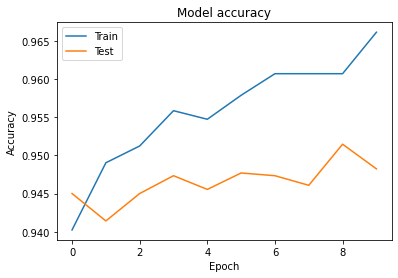

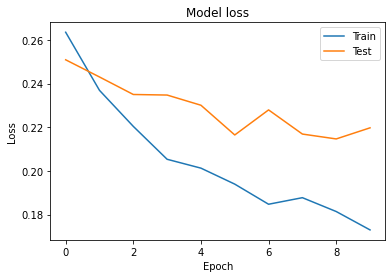

In [ ]:
import matplotlib.pyplot as plt  # it overfits after epoch 11, but starts to learn again after 14

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()